In [1]:
from tucan.io import graph_from_file
from tucan.canonicalization import partition_molecule_by_attribute, refine_partitions, get_refinement_tree_node_children, get_refinement_tree_levels
from tucan.visualization import draw_molecules
from tucan.graph_attributes import PARTITION, INVARIANT_CODE

In [2]:
m_name = "Petersen_graph"
m = graph_from_file(f"../tests/molfiles/{m_name}/{m_name}.mol")
m_partitioned_by_invariants = partition_molecule_by_attribute(m, INVARIANT_CODE)

At this point, all node attributes that are included in `INVARIANT_CODE` are encoded in the node's `PARTITION` attribute.
That is, in the subsequent canonicalization steps, all node attributes that are included in `INVARIANT_CODE` can be disregarded.

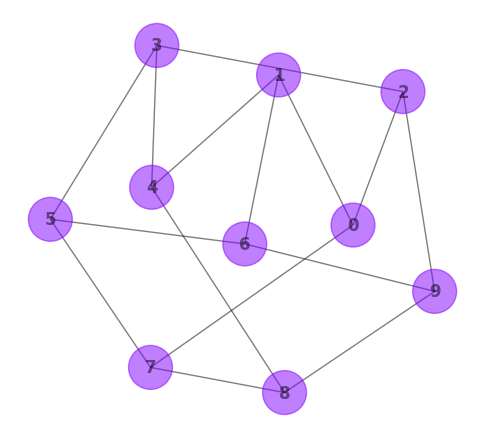

In [3]:
m_refined = list(refine_partitions(m_partitioned_by_invariants))[-1]
draw_molecules([m_refined], [""], highlight=PARTITION)

Build refinement tree with BFS.
See https://doi.org/10.1016/j.jsc.2013.09.003 and https://pallini.di.uniroma1.it/SearchTree.html.

Side note: Both atoms and vertices on the refinement tree are called "nodes" atm.
Call node on the refinement tree "refinement-tree-node" to avoid confusion.

Once the partitions are maximally refined, we need to artificially refine them until they're discrete.
In order to artificially refine the partitions, we need to split them. See `get_refinement_tree_node_children`.
Below we show how to generate the nodes for one level of the refinement tree.

10


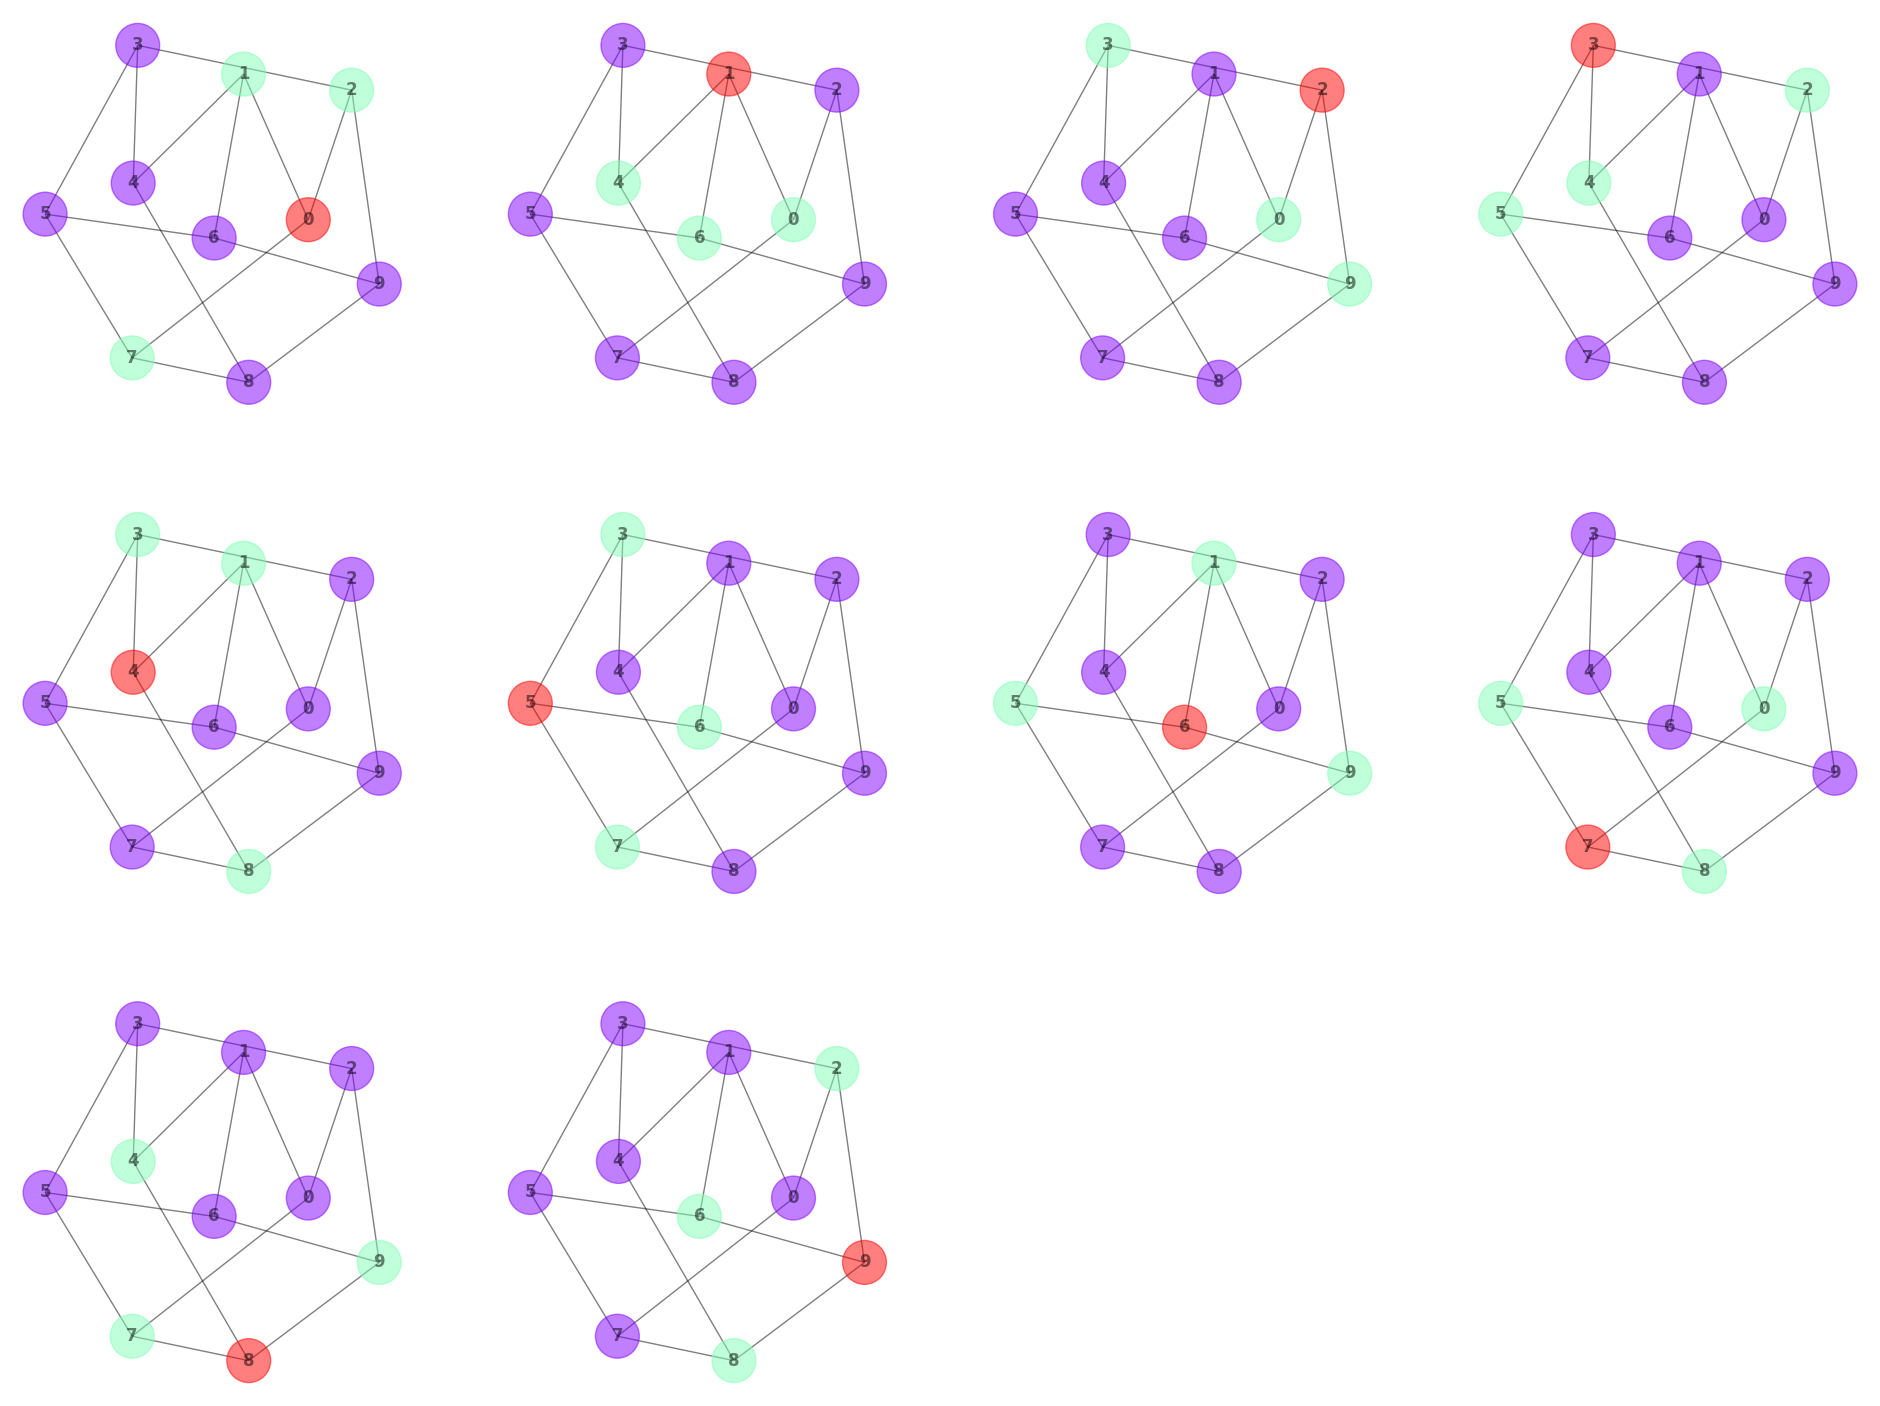

In [4]:
children = list(get_refinement_tree_node_children(m_refined))
print(len(children))
draw_molecules(children, ["" for _ in range(len(children))], highlight=PARTITION)

Let's build up the entire refinement-tree. The leaves (i.e., nodes at the final level) are the discrete partitionings.
Note: Distinguish between "partitioning" (set of partitions of one graph) and "partition".

The leaves of the refinement-tree are the 120 automorphisms of the [Petersen graph](https://en.wikipedia.org/wiki/Petersen_graph). Also see https://pallini.di.uniroma1.it/SearchTree.html.

4


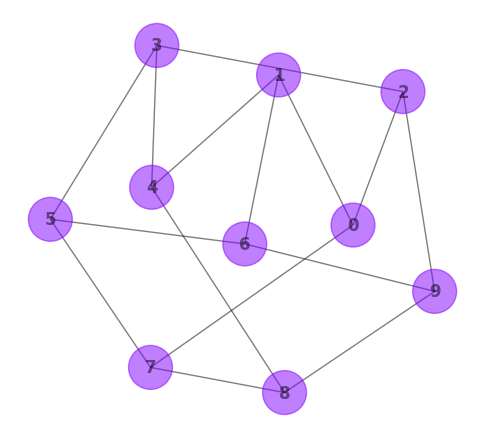

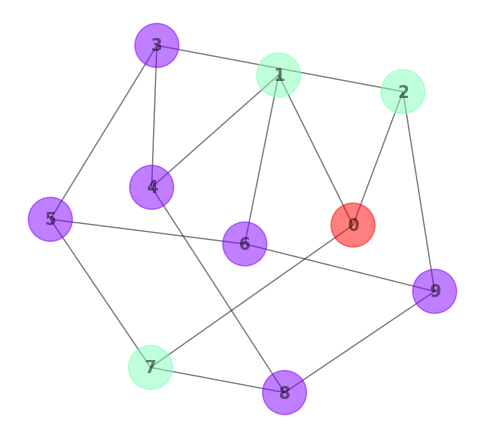

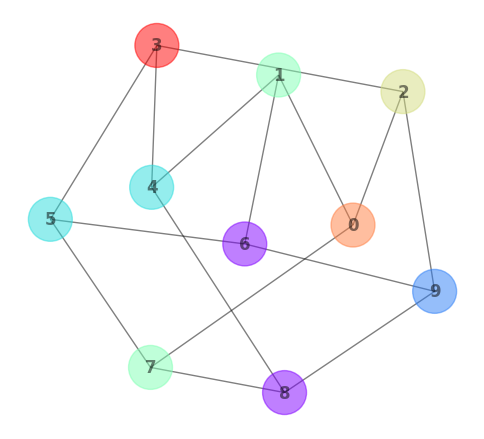

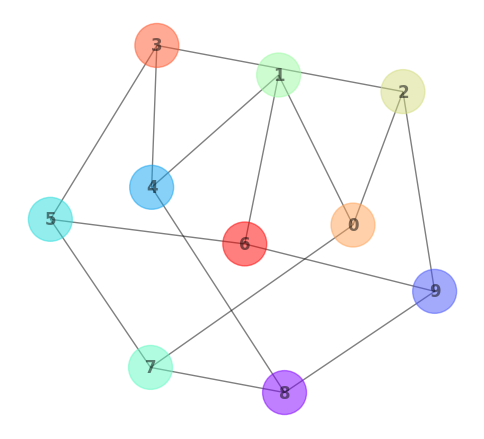

In [5]:
refinement_tree_levels = list(get_refinement_tree_levels(m_refined))
print(len(refinement_tree_levels))
for level in refinement_tree_levels:
    draw_molecules(level, ["" for _ in range(len(level))], highlight=PARTITION)

## Feedback on performance and correctness

Currently (HEAD commit on `main` at September 17) `pytest tests/test_canonicalization.py::test_permutation_invariance` fails for 104 structures (exclusively timeout failures, no invariance failures):

```
====================================================== short test summary info ======================================================
FAILED tests/test_canonicalization.py::test_permutation_invariance[C28_H32_N8_Zn_B_F4_2_H2O_in_P21_c] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[Paclitaxel] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[C28_H36_N8_Zn_C_F3_S_O3_2_C4_H8_O_in_Pca21] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[14Ethyl14methylheptadecanoic acid] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[Isohexan] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[18Methylnonadecanoic acid] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[q17_a14sadm_in_Pbca] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[cyclophane2] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[tv027_0m_in_P2_1] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[EMIM-BF4] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[ZnC20H34N6O4_in_P2_1_c] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[n17_a96-1_in_P2_1] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[C12_H24_Cl2_N6_Zn_in_C2_c] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[Mn2CO10] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[Z 16 ethyl 15,17,17 trimethyloctadec9enoic acid] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[E 16,16,17,18 tetramethylnonadec9enoic acid] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[CHEMBL2348759] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[C240] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[10tertButyl10isopropyltridecanoic acid] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[m18_a24alex_in_P2_1_2_1_2_1] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[C16_H22_N4_O6_S2_Zn_in_P2_1_c] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[C21_H42_Cl_N10_Zn_Cl_in_P21_c] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[C16_H20_N4O_Zn_Cl2_in_P2_1_n] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[q17_a37sadm_in_P1_New_P21] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[C180] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[Neohexan] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[C60H60] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[C36_H72_Cl4_N14_Zn2_0_5_CH3CN_2_5_Et2O_in_P-1] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[C18_H24_N4_O4_Zn_in_P2_1_c] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[C24_H48_N12_Zn_C_F3_S_O3_2_in_P-1] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[n16_a100_in_P2_1_c] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[CCDC2216842v3] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[3 Methylpentan] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[E 20 methyldocos13enoic acid] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[[8]cycloparaphenylene] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[2-8-dimethyldecane] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[TEMPO] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[C70] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[C18_H22_N4_O4_Zn_in_P-1] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[Os4CO16] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[Streptomycin] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[C60] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[C14_H18_Cl2_N4_Zn_in_P2_1_c] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[C15_H18_Cl2_N4_Zn_in_P2_1_n] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[n17_a41sad_in_P2_1_n] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[Oxo] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[C21_H48_Cl_N10_Zn_S_O3_C_F3_in_P2_1_n] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[Zn_C30_H42_N8_S2_O6_in_P2_1_c] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[Neopentan] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[a15_a89a_in_P-1_New_I2_c] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[NH4PF6] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[n16_a19s_in_P-1_New_P21_c] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[C22_H28_N4_O6_Zn_in_P2_1_n] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[5tertButyl4isobutyl5isopropyl4methyloctanoic acid] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[rv160_in_P2_1_n] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[2heptadecanoyloxy 3stearoyloxy propyl 17methyloctadecanoate] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[Doxorubicin] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[tv241_0m_in_P2_1_n] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[n16_a123_in_P2_1_2_1_2_1] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[PH4PF6] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[3,7,11,15 tetramethylhexadecanoic acid] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[n17_b82sad_in_P2_1_n] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[FeBr2TMGasme] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[Ir4CO12] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[m17_a35sad_in_P2_1] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[2palmitoyloxy3 14,15,16-trimethylheptadecanoyloxy propyl stearate] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[ro007_in_P2_1_2_1_2_1] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[FeCl2TMG5NMe2asme] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[a15_a88c_in_P-1_New_P21_c] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[Zn_Cl2_N6_C16_H28_in_P2_1_c] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[Z 21 methyldocos13enoic acid] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[decaline] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[Peroxo] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[C19_H24_N4_O4_Zn_0_13_H2O_in_P2_1_n] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[2 4 Dimethylbutan] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[rv222_in_P2_1_2_1_2_1] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[rv202_in_P2_1_c] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[9Z,12Z,26Z 35 methylheptatriaconta9,12,26trienoic acid] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[Icosanoic acid] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[CHEMBL415840] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[SbH4PF6] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[6,15Dimethyloctadecanoic acid] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[glycerol tristearate] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[a16_a07sada_in_P2_1_c] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[C80] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[insulin] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[n16_a77sad1_in_P2_1] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[C20_H26_N4_O5_Zn_0_27_H2O_in_P2_1_n] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[Fe3CO12] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[C18_H26_N4_Zn_Cl2_in_P2_1_2_1_2_1] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[rv006_in_P2_1_c] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[9Z,12Z,36E octatriaconta9,12,36trienoic acid] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[NiCOD2] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[C16_H30_N6_O4_Zn_in_P-1] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[Carboplatin] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[nHexan] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[adamantane] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[a1140_in_P2_1_c] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[tv342_in_P1_New_P-1] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[tv356_0m_in_P2_1_n] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[C18_H22_Cl2_N4_O2_Zn_in_P2_1_c] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[tv217_p1_in_P1_New_P-1] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[qv043_in_P2_1_New_Pca21] - Failed: Timeout >10.0s
FAILED tests/test_canonicalization.py::test_permutation_invariance[Vancomycin] - Failed: Timeout >10.0s
=========================================== 104 failed, 129 passed in 1199.82s (0:19:59) ============================================

```


The goal is to bring that number down by optimizing performance (e.g., additional pruning of refinement-tree, increasing efficiency of automorphism filter).

For faster feedback run `pytest tests/test_canonicalization.py::test_permutation_invariance[<failed ID>]`.